In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [2]:
fastfood = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv")
fastfood.head(10)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,ZIP_Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/14,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/04,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/97,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/01,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/99,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out
5,Angelia's Pizza,JNG Pizza LLC,5/11/04,202,Moon Clinton Rd,15108,40.513135,-80.223406,Take Out
6,Angelia's Pizza / Chill Frozen Dessserts,Eaton Pizza Inc,10/7/05,410,Penn Lincoln Dr,15126,40.442466,-80.235992,Take Out
7,Antney's Ice Cream,The Iceman Inc,4/11/02,1316,Poplar St,15205,40.427470,-80.052435,"Breakfast, Drink, Other"
8,Arby's,Kinco Inc,1/1/75,1617,Freeport Rd,15065,40.622125,-79.727516,Dollar Menu
9,Arby's #8,Linell Corporation,12/3/07,3974,Wm Penn Hwy,15146,40.437988,-79.772845,Dollar Menu


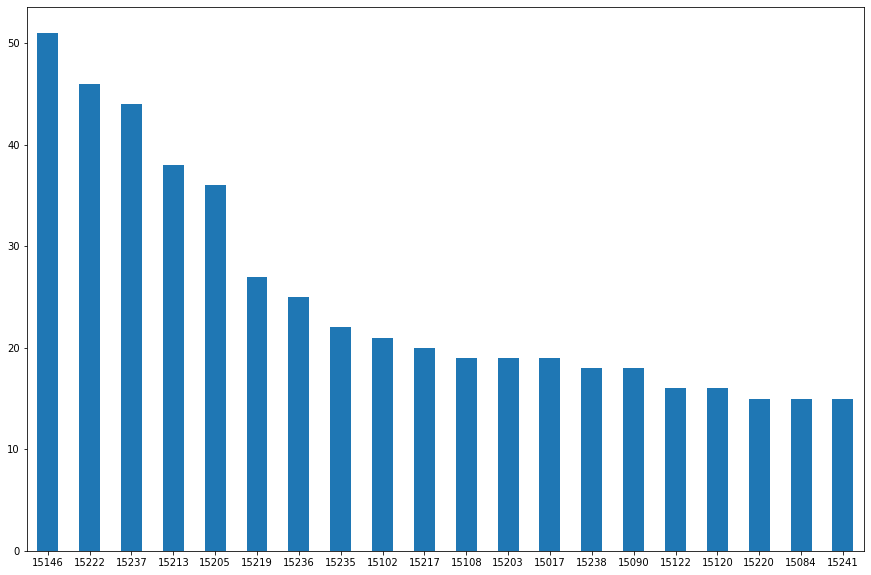

In [3]:
quick_graph = (fastfood['ZIP_Code'].value_counts()).head(20)
quick_graph.plot.bar(figsize=(15, 10), rot = 0)

I first created a quick bar chart to find the 20 most frequent zipcodes in the dataset.  This would represnet the 20 zipcodes that have the most fast food locations.  However, because of our issue with the zipcodes, some entries will have to be removed.  This was just a quick way to get a sense of the data I was working with.

In [4]:
zipcode = fastfood.groupby('ZIP_Code').count()
zipcode.sort_values(by=['Name'], ascending = False)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15146,51,50,51,49,51,51,51,51
15222,46,43,46,46,46,46,46,46
15237,44,40,44,44,44,44,44,44
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
...,...,...,...,...,...,...,...,...
15148,1,1,1,1,1,1,1,1
15207,1,1,1,1,1,1,1,1
15208,1,1,1,1,1,1,1,1


In [5]:
zipcode = fastfood.groupby('ZIP_Code').count()
zipcode_sorted = zipcode.sort_values(by=['Name'], ascending = False)
zipcode_sorted.head(10)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15146,51,50,51,49,51,51,51,51
15222,46,43,46,46,46,46,46,46
15237,44,40,44,44,44,44,44,44
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
15219,27,23,27,27,27,27,27,27
15236,25,22,25,24,25,25,25,25
15235,22,21,22,22,22,22,22,22
15102,21,20,21,21,21,21,21,21


I then sorted the zipcodes by the frequency of fast food locations, by grouping the data by ZIP code, and then sorting by Name. After sorting, I was able to find the 10 zipcodes with the most fast food locations. 
<br>
<br>
TOP 10 ZIPCODES: 
<br>
15146 - Monroeville, PA <br>
15222 - Troy Hill <br>
15237 - McKnight <br>
15213 - Oakland <br>
15205 - Crafton <br>
15219 - Central Business District / Downtown <br>
15236 - Pleasant Hills / West Mifflin <br>
15235 - Penn Hills <br>
15102 - Bethel Park, PA <br>
15217 - Squirrel Hill <br> <br>
After this, I will remove the zipcodes outside of Pittsburgh and neighborhoods not listed on our standardized neighborhood list.

In [6]:
zipcode_sorted =  zipcode_sorted.drop(zipcode_sorted.index[0])
zipcode_sorted =  zipcode_sorted.drop(zipcode_sorted.index[1])
zipcode_sorted =  zipcode_sorted.drop(zipcode_sorted.index[4])
zipcode_sorted =  zipcode_sorted.drop(zipcode_sorted.index[4])
zipcode_sorted =  zipcode_sorted.drop(zipcode_sorted.index[4])
print("After removing invalid neighborhoods: ")
zipcode_invalid = zipcode_sorted.head(5)
zipcode_invalid.head(5)

After removing invalid neighborhoods: 


,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15222,46,43,46,46,46,46,46,46
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
15219,27,23,27,27,27,27,27,27
15217,20,20,20,20,20,20,20,20


TOP 5 ZIPCODES AFTER REVISION: <br> 
15222 - Troy Hill<br> 
15213 - Oakland<br> 
15205 - Crafton<br> 
15219 - Central Business District / Downtown<br> 
15217 - Squirell Hill<br> 

I constructed a pie chart to visualize the top 5 zipcodes:


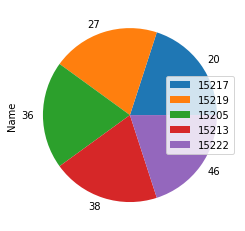

In [7]:
print("I constructed a pie chart to visualize the top 5 zipcodes:")
zipcode_pie = zipcode_invalid["Name"].value_counts().sort_index().plot.pie(y='Name', 
                                                  subplots=False, 
                                                  figsize=(8, 4), legend = "True")
zipcode_pie.legend(['15217', '15219', '15205', '15213', '15222'], loc = "right")

The last analysis I did was to look at a specific fast food location, and sort the data based on that. I chose McDonalds, the healthiest and most iconic of all fast food locations.  

In [8]:
print("Sorting the data based on McDonald's looked like this:")
mcdonalds = fastfood[fastfood['Name'].str.contains("McDonald's", na = True)]
sorted_mcdonalds = mcdonalds.groupby('ZIP_Code').count()
sorted_mcdonalds.sort_values(by=['Name'], ascending = False)

Sorting the data based on McDonald's looked like this:


,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15222,3,2,3,3,3,3,3,3
15205,2,1,2,2,2,2,2,2
15108,2,2,2,2,2,2,2,2
15044,2,2,2,2,2,2,2,2
15146,2,2,2,2,2,2,2,2
15122,2,2,2,2,2,2,2,2
15231,2,2,2,0,2,2,2,2
15206,2,2,2,2,2,2,2,2
15235,2,2,2,2,2,2,2,2


### Jason's Conclusion
Based on our metric, I was expecting Downtown to be the best neighborhood, being that has a lot of stores and shops.  It ranked relatively high in the Fast Food submetric, but not very high in the other two metrics.  I currently live in South Oakland, and being from outside Pittsburgh, haven't got to experience that many different Pittsburgh neighborhoods.  Therefore if I were to pick a personal best neighborhood, it would had been Oakland / South Oakland, which didn't perform terribly in our submetrics, but fell short of being amongst the best neighborhoods.